In [1]:
import numpy as np

In [2]:
from code8_1 import *  # 定数ステップ幅を用いた近接勾配法 ProximalGradient_constのコードを読み込み
from code8_2 import *  # 近接勾配法(バックトラッキング) ProximalGradient_backtrack のコードを読み込み
from code8_3 import *  # FISTA のコードを読み込み
from code8_4 import *  # ソフト閾値関数 soft_thresholding のコードを読み込み

In [4]:
# ========= 実験設定：L1正則化付き線形最小二乗（LASSO型）を
# ========= 近接勾配法（定数/バックトラッキング）と FISTA で解くデモである
import numpy as np

# 乱数の再現性確保
np.random.seed(0)

# 問題サイズ（特徴量数 n、サンプル数 m）
n, m = 1000, 1000

# デザイン行列 A（m×n）と観測ベクトル b（m）
A = np.random.randn(m, n)
b = np.random.randn(m)

# L1 正則化の重み（φ(x) = C||x||_1）
C = 10


# ----- 目的関数 f(x) = 1/2 ||Ax - b||_2^2 とその勾配 ∇f(x) -----
def LS(x):
    """二乗和誤差：f(x) = 1/2 * ||Ax - b||^2"""
    Axb = A @ x - b
    return 0.5 * (Axb @ Axb)


def nab_LS(x):
    """勾配：∇f(x) = A^T(Ax - b)"""
    Axb = A @ x - b
    return A.T @ Axb


# 非滑らか項 φ(x) = C||x||_1（監視用；目的値表示など）
l1 = lambda x: C * np.linalg.norm(x, 1)

# ----- ステップ幅設定のための L（∇f のリプシッツ定数）推定 -----
# ∇f(x) = A^T A x - A^T b のリプシッツ定数 L は A^T A の最大固有値に等しい
# alpha を 1/L（または ≤1/L）にとると PGM/FISTA の収束が理論保証されやすい。
# 注意：eig は O(n^3) で計算コストが大きい。大規模ではべき乗法（power iteration）等が推奨。
eig, eigv = np.linalg.eig(A.T @ A)
L = np.max(eig).real  # 数値誤差で複素になる場合があるため .real を明示

# 初期点（ゼロベクトル）
x_0 = np.zeros(n)


# ----- 近接写像：ソフト閾値（φ(x)=C||x||_1 の prox） -----
def soft_thresholding(v, Cthr):
    """
    近接写像 prox_{Cthr ||·||_1}(v) = sign(v) * max(|v| - Cthr, 0)
    Cthr には α*C（ステップ幅α×重みC）を渡す。
    """
    return np.sign(v) * np.maximum(np.abs(v) - Cthr, 0.0)


# ===== 実行：PGM（定数ステップ幅 / バックトラッキング）と FISTA =====
# alpha = 1/L を指定（理論上は 0 < alpha ≤ 1/L が目安）
x_PG = ProximalGradient_const(LS, nab_LS, l1, soft_thresholding, C, x_0, 1 / L)
x_PG_Back = ProximalGradient_backtrack(LS, nab_LS, l1, soft_thresholding, C, x_0)
x_FISTA = FISTA(LS, nab_LS, l1, soft_thresholding, C, x_0, 1 / L)

# （任意）最終目的値の表示例：
# print("PG 目的値:", LS(x_PG) + l1(x_PG))
# print("PG-Back 目的値:", LS(x_PG_Back) + l1(x_PG_Back))
# print("FISTA 目的値:", LS(x_FISTA) + l1(x_FISTA))

/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:39: RuntimeWarning: divide by zero encountered in matmul
  eig, eigv = np.linalg.eig(A.T @ A)
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:39: RuntimeWarning: overflow encountered in matmul
  eig, eigv = np.linalg.eig(A.T @ A)
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:39: RuntimeWarning: invalid value encountered in matmul
  eig, eigv = np.linalg.eig(A.T @ A)
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: divide by zero encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: overflow encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: invalid value encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61f

In [3]:
from code8_1v2 import *  # 定数ステップ幅を用いた近接勾配法 ProximalGradient_constのコードを読み込み（点列のログを残すバージョン）
from code8_2v2 import *  # 近接勾配法(バックトラッキング) ProximalGradient_backtrack のコードを読み込み（点列のログを残すバージョン）
from code8_3v2 import *  # FISTA のコードを読み込み（点列のログを残すバージョン）
from code8_4 import *  # ソフト閾値関数 soft_thresholding のコードを読み込み

/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: divide by zero encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: overflow encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:28: RuntimeWarning: invalid value encountered in matmul
  Axb = A @ x - b
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:29: RuntimeWarning: divide by zero encountered in matmul
  return A.T @ Axb
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:29: RuntimeWarning: overflow encountered in matmul
  return A.T @ Axb
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:29: RuntimeWarning: invalid value encountered in matmul
  return A.T @ Axb
/var/folders/0t/6d51btm11zz6lw61fgrmf7z00000gn/T/ipykernel_60541/2958256977.py:22: Runt

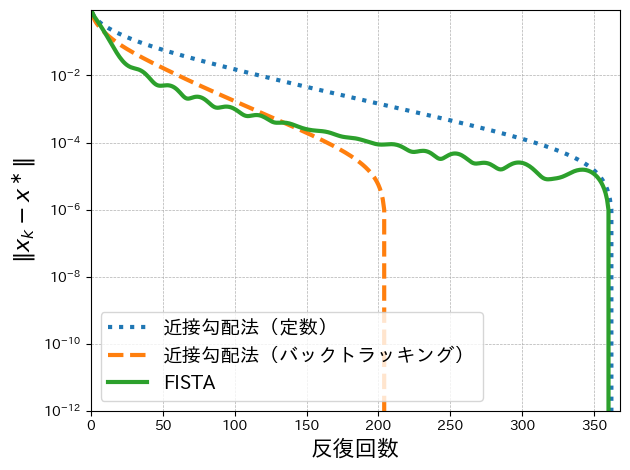

In [5]:
# 収束曲線の可視化（PGM定数 / PGMバックトラッキング / FISTA）
# 注意：
#  - ここでは「点列ログを返す版」の関数（seq_xを返す）を呼び出している前提
#    ProximalGradient_const / ProximalGradient_backtrack / FISTA が
#    np.array([...]) を返す実装になっていることを確認すること
#  - 対数軸（semilogy）では 0 や負値は使用できないため、ylim の上限に 0 を置かないこと

import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

eps = 1.0e-6

# 反復点列（各行が反復ごとの x_k）
seq_PG = ProximalGradient_const(
    LS, nab_LS, l1, soft_thresholding, C, x_0, 1 / L, eps=eps
)
seq_PG_Back = ProximalGradient_backtrack(
    LS, nab_LS, l1, soft_thresholding, C, x_0, eps=eps
)
seq_FISTA = FISTA(LS, nab_LS, l1, soft_thresholding, C, x_0, 1 / L, eps=eps)

# 終点（近似解）との差のノルム ||x_k - x*|| を誤差指標として計算
# ※ seq_*** の最後の行を x*（近似解）とみなす
err_PG = np.linalg.norm(seq_PG - seq_PG[-1], axis=1)
err_PG_Back = np.linalg.norm(seq_PG_Back - seq_PG_Back[-1], axis=1)
err_FISTA = np.linalg.norm(seq_FISTA - seq_FISTA[-1], axis=1)

# 反復回数の軸（1,2,...）
ax_iter = np.arange(1, len(err_PG) + 1)
plt.semilogy(ax_iter, err_PG, linestyle=":", linewidth=3, label="近接勾配法（定数）")

ax_iter = np.arange(1, len(err_PG_Back) + 1)
plt.semilogy(
    ax_iter,
    err_PG_Back,
    linestyle="--",
    linewidth=3,
    label="近接勾配法（バックトラッキング）",
)

ax_iter = np.arange(1, len(err_FISTA) + 1)
plt.semilogy(ax_iter, err_FISTA, linestyle="-", linewidth=3, label="FISTA")

# 軸ラベル
plt.xlabel("反復回数", fontsize=16)
plt.ylabel(r"$\|x_k - x^\ast\|$", fontsize=16)

# 表示範囲（ログ軸なので下限>0に注意）
# 自動スケーリングで問題なければコメントアウト可
ymin = min(err_PG.min(), err_PG_Back.min(), err_FISTA.min())
ymax = max(err_PG.max(), err_PG_Back.max(), err_FISTA.max())
# わずかに上下に余白を足す（0や負値は不可）
plt.ylim(max(ymin * 0.8, 1e-12), ymax * 1.2)

# 横軸の上限（必要に応じて調整）
plt.xlim(0, max(len(err_PG), len(err_PG_Back), len(err_FISTA)) + 5)

plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()